In [67]:
import omicverse as ov
import anndata as ad
import pandas as pd
import muon as mu
from muon import MuData 
import mofax as mofa

In [37]:
# Load the data
rna = pd.read_csv("/home/azureuser/GBM/preprocessed/gbm_rnaseq.csv")
protein = pd.read_csv("/home/azureuser/GBM/preprocessed/gbm_proteomics.csv")
methylation = pd.read_csv("/home/azureuser/GBM/preprocessed/gbm_methylation.csv")

In [ ]:
# create anndata object
X_rna = rna.iloc[:, 1:].values
X_protein = protein.iloc[:, 1:].values
X_methylation = methylation.iloc[:, 1:].values

obs_rna = pd.DataFrame(rna.iloc[:, 0])
obs_protein = pd.DataFrame(protein.iloc[:, 0])
obs_methylation = pd.DataFrame(methylation.iloc[:, 0])

rna = ad.AnnData(X=X_rna, obs=obs_rna)
protein = ad.AnnData(X=X_protein, obs=obs_protein)
methylation = ad.AnnData(X=X_methylation, obs=obs_methylation)


In [55]:
rna = ad.AnnData(X_rna.T)
protein = ad.AnnData(X_protein.T)
methylation = ad.AnnData(X_methylation.T)


In [56]:
mdata = mu.MuData({ "rna": rna, "protein": protein, "methylation": methylation })

In [59]:
mu.tl.mofa(mdata, use_obs='union',
           n_factors=15, convergence_mode='medium',
           outfile="model.hdf5")


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=97 samples and D=1200 features...
Loaded view='protein' group='group1' with N=97 samples and D=8358 features...
Loaded view='methylation' group='group1' with N=97 samples and D=1200 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Sp

In [60]:
mdata

MuData object with n_obs × n_vars = 97 × 10758
  uns:	'mofa'
  obsm:	'X_mofa'
  varm:	'LFs'
  3 modalities
    rna:	97 x 1200
    protein:	97 x 8358
    methylation:	97 x 1200

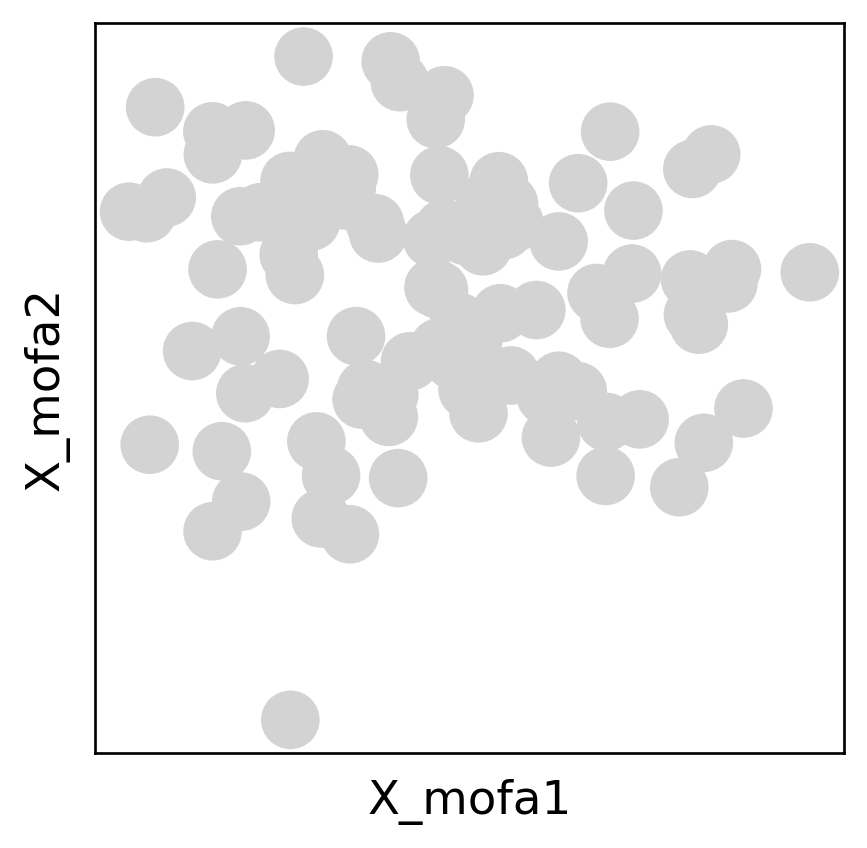

In [64]:
mu.pl.mofa(mdata)

In [68]:
model = mofa.mofa_model("model.hdf5")
model

MOFA+ model: model
Samples (cells): 97
Features: 10758
Groups: group1 (97)
Views: methylation (1200), protein (8358), rna (1200)
Factors: 15
Expectations: W, Z

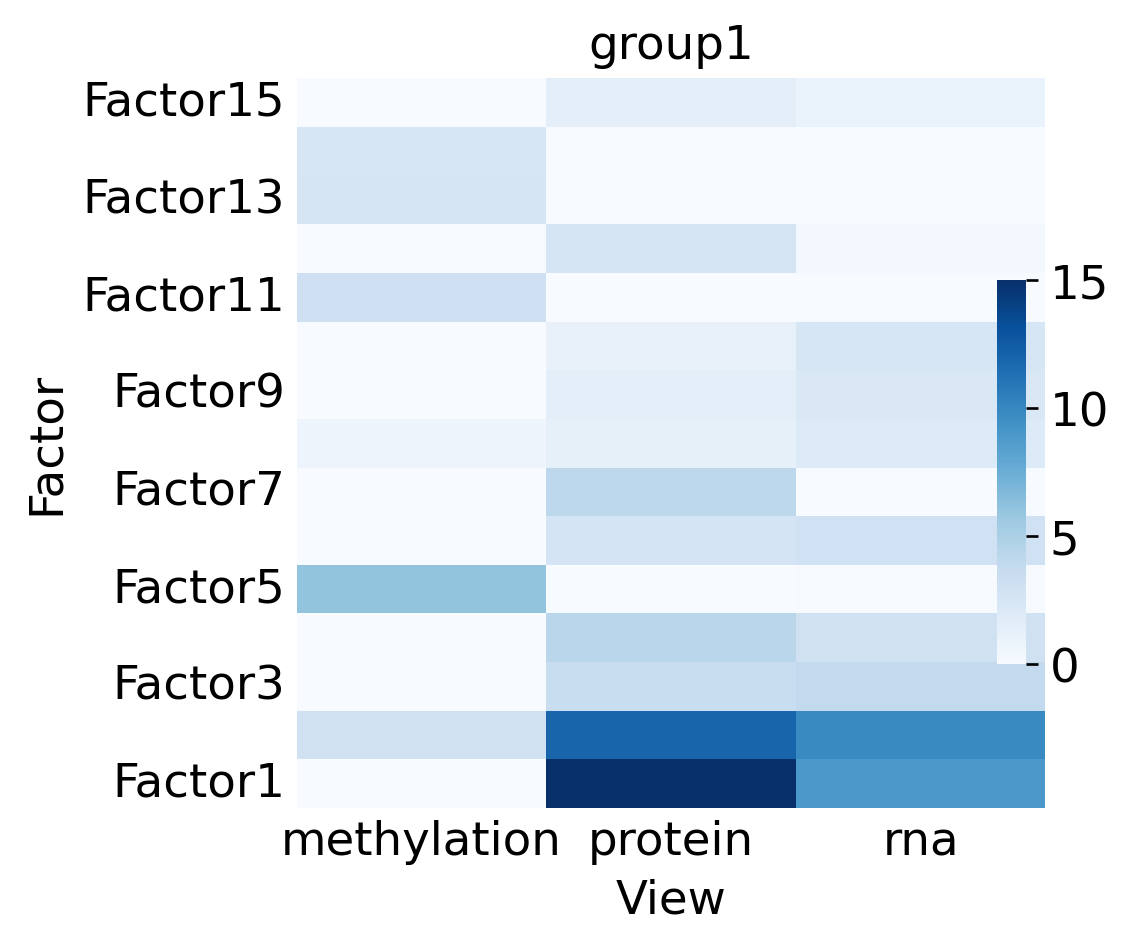

In [69]:
mofa.plot_r2(model, x='View', vmax=15)


<AxesSubplot: title={'center': 'methylation'}, xlabel='Feature weight'>

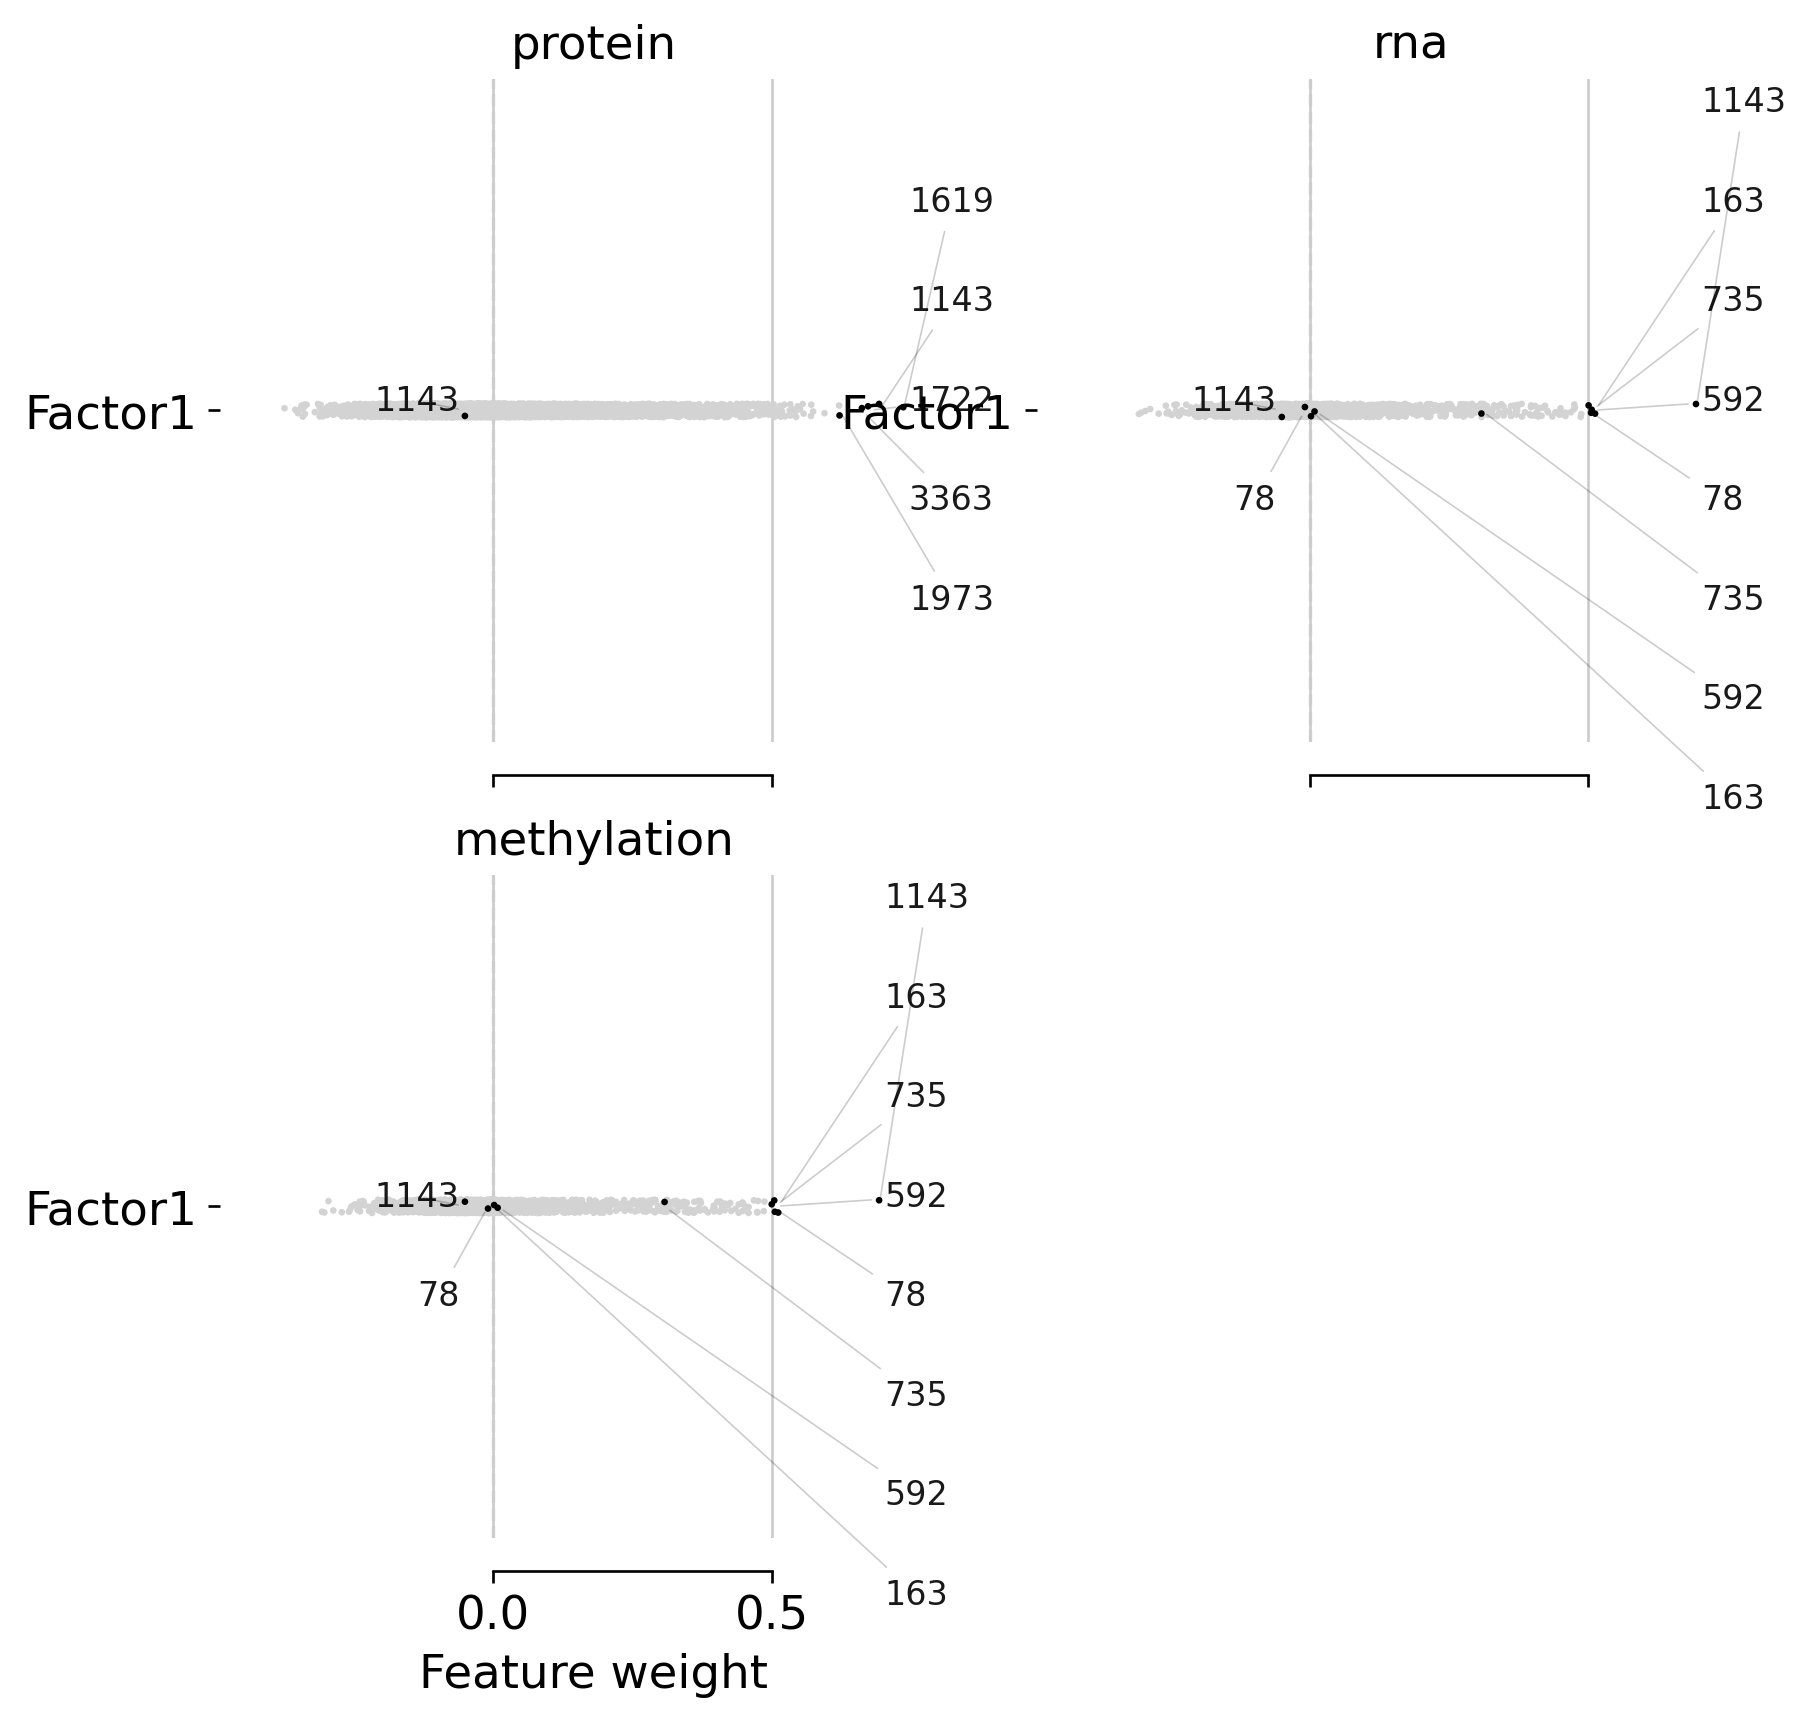

In [71]:
mofa.plot_weights(model, views=['protein', 'rna'], factors=0, zero_line=True, ncols=2, label_size=10)


In [77]:
#save mdata 
mdata.write("mdata.h5ad")

In [80]:
# load to mdata
mdata = ad.read('mdata.h5ad', backed='r')

In [81]:
mdata

AnnData object with n_obs × n_vars = 97 × 10758 backed at 'mdata.h5ad'
    uns: 'mofa'
    obsm: 'X_mofa', 'methylation', 'protein', 'rna'
    varm: 'LFs', 'methylation', 'protein', 'rna'

In [85]:
ov.utils.ov_plot_set()
pymofa_obj=ov.single.pyMOFAART(model_path='model.hdf5')


Dependency error: The 'bioservices' distribution was not found and is required by the application


(<Figure size 160x240 with 2 Axes>,
 <AxesSubplot: title={'center': 'Varience'}, xlabel='View', ylabel='Factor'>)

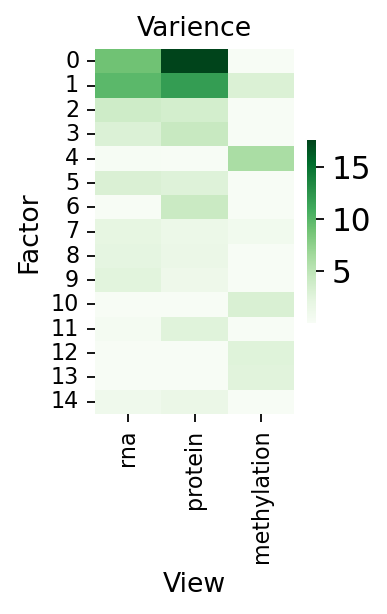

In [86]:
pymofa_obj.plot_r2()

In [87]:
pymofa_obj.get_r2()

,rna,protein,methylation
0,8.922620,17.517773,0.000833
1,9.808935,11.900220,3.002044
2,3.890064,3.548289,0.000470
3,2.933299,4.334920,0.000207
4,0.080169,0.000353,6.085109
5,3.074937,2.679759,0.000113
6,0.030793,4.181806,0.000389
7,1.985197,1.344982,0.775967
8,2.180403,1.526639,0.000581
9,2.403988,1.144793,0.000106


In [90]:
pymofa_obj.plot_top_feature_heatmap()


TypeError: pyMOFAART.plot_top_feature_heatmap() missing 1 required positional argument: 'view'